# **Task-1** Why you cannot use even number for block_size in adaptive thresholding?

In adaptive thresholding, the algorithm calculates the threshold for each pixel using a neighborhood of surrounding pixels. If the block size is odd, there is a central pixel that acts as a reference, ensuring a symmetric neighborhood, whereas an even block size would lack a single central pixel, making it ambiguous where to center the local region. Many image processing operations, including adaptive thresholding, rely on kernel-based computations, and convolution operations typically work best with odd-sized kernels since they have a well-defined center. Using an even-sized block would require an arbitrary decision about how to define the center, potentially leading to inconsistencies. Additionally, OpenCV’s adaptiveThreshold() explicitly enforces that the block size must be an odd integer greater than 1 to ensure consistent behavior across different implementations and avoid unnecessary complications.

# **Task-2** Use adaptive thresholding method to separate the given berry image from background + remove unwanted background as better as possible.

Text(0.5, 1.0, 'Gray Scale Image')

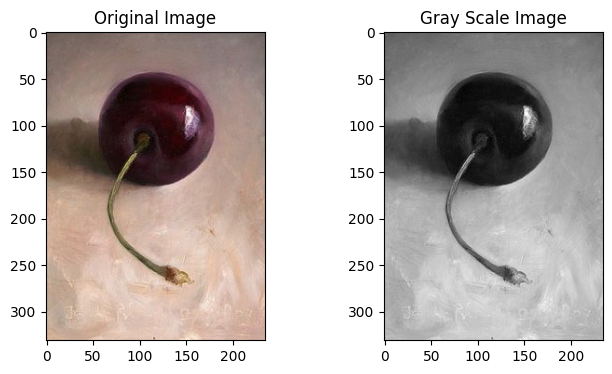

In [ ]:
import cv2
from matplotlib import pyplot as plt
img_path = "/content/drive/MyDrive/Colab Notebooks/berry-1.jpg"
img = cv2.imread(img_path)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/berry-1.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(image, cmap="gray")
plt.title("Gray Scale Image")


### Type 1 Mean Adaptive Thresholding

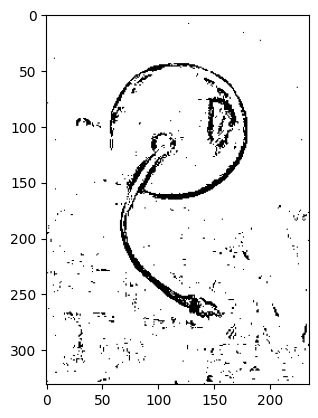

In [ ]:
adaptive_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 10)
plt.imshow(adaptive_mean, 'gray')

### Type 2 Gaussian Adaptive Thresholding

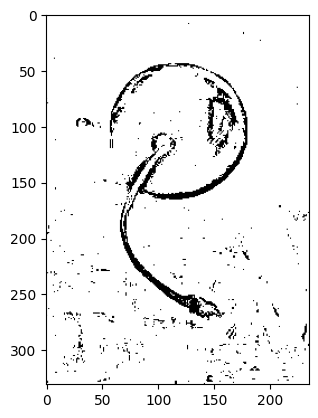

In [ ]:
adaptive_gaussian = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 10)
plt.imshow(adaptive_gaussian, 'gray')

# **Optional Task** How can you determine the value of C (pos, zero, neg)

In OpenCV’s adaptive thresholding, the value of C is a constant subtracted from the computed local threshold value. It adjusts the sensitivity of the thresholding process:

*   Positive C (+ve): The threshold is lowered, making more pixels white (foreground).
*   Zero C (0): The computed threshold remains unchanged.
*   Negative C (-ve): The threshold is increased, making more pixels black (background).



# Prove that, setting your threshold value does not affect the final threshold set for the output image.

Otsu’s threshold is computed purely from the histogram of the image, and the algorithm does not take a user-defined threshold as input. Instead, it iterates over all possible thresholds and selects the optimal one based on the variance criterion. Any manually set threshold value before applying Otsu’s method is ignored because the method independently determines
𝑇∗. Even if a threshold is provided, Otsu’s method will recalculate and override it with the computed value. Thus, setting an arbitrary threshold beforehand has no effect on the final threshold determined by Otsu’s method, proving that it is completely data-driven and independent of manual inputs.

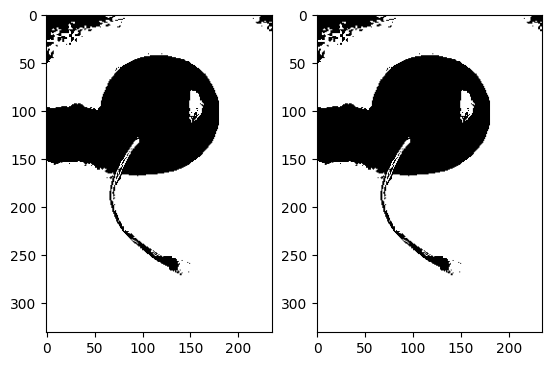

In [ ]:
ret1, otsu_threshold1 = cv2.threshold(image, 20, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

ret2, otsu_threshold2 = cv2.threshold(image, 60, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


plt.subplot(1, 2, 1)
plt.imshow(otsu_threshold1, 'gray')

plt.subplot(1, 2, 2)
plt.imshow(otsu_threshold2, 'gray')

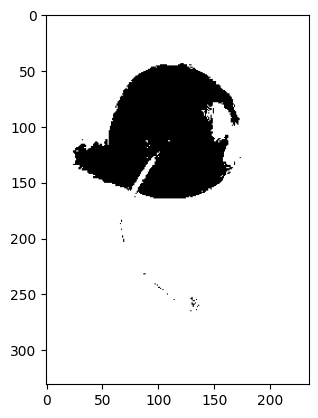

In [ ]:
ret, global_binary_thresholded = cv2.threshold(image, 60, 255, cv2.THRESH_BINARY)
plt.imshow(global_binary_thresholded, cmap="gray")

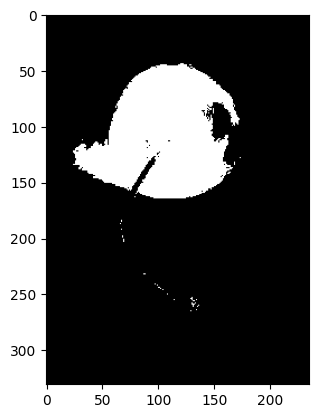

In [ ]:
ret, global_binary_thresholded = cv2.threshold(image, 60, 255, cv2.THRESH_BINARY_INV)
plt.imshow(global_binary_thresholded, cmap="gray")